In [28]:
####    Kth nearest neighbor

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
df = pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Classified%20Data", index_col= 0)

In [ ]:
df.info()

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('TARGET CLASS', axis= 1))

In [ ]:
#creates standardization
# default values
StandardScaler(copy= True, with_mean= True, with_std= True)
# uncessary for this df

In [34]:
# standardizes the data
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis= 1))

In [36]:
# row of column names
df_feat = pd.DataFrame(scaled_features, columns= df.columns[:-1])

In [57]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size = 0.3)

In [42]:
from sklearn.neighbors import  KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [44]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
# optional
KNeighborsClassifier(algorithm= 'auto', leaf_size= 30, metric= 'minkowski', metric_params= None,
                     n_jobs= 1, n_neighbors= 1, p= 2, weights= 'uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [53]:
prediction = knn.predict(x_test)

In [54]:
from sklearn.metrics import  classification_report, confusion_matrix

In [58]:
c_m = confusion_matrix(y_test, prediction)
print(c_m)

[[141  16]
 [  9 134]]


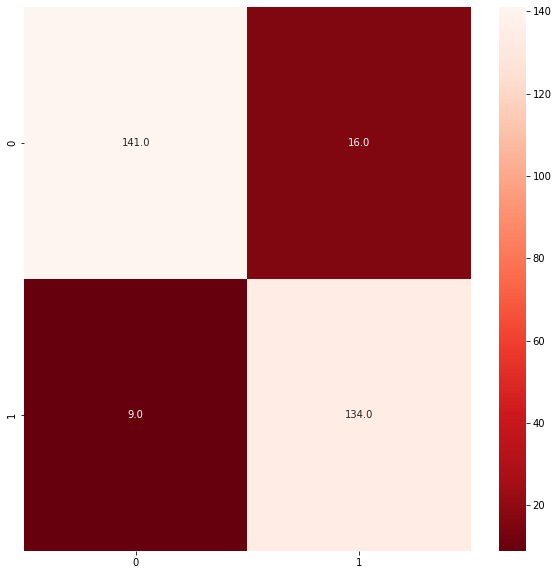

In [68]:
plt.figure(figsize= (10,10))
sns.heatmap(c_m, annot= True, fmt ='.1f', cmap= 'Reds_r')

In [56]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       157
           1       0.89      0.94      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

